
#classifier:digit prediction

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets,metrics
from sklearn.ensemble import RandomForestClassifier
import numpy
import cv2

In [3]:
# the digits dataset is taken
digits=datasets.load_digits()


In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

In [4]:
digits.images[1795] #image of the digit
#import matplotlib.image as mpimg

#image1=mpimg.imread(digits.images[1795],1)
#mage1


array([[ 0.,  0.,  2., 10.,  7.,  0.,  0.,  0.],
       [ 0.,  0., 14., 16., 16., 15.,  1.,  0.],
       [ 0.,  4., 16.,  7.,  3., 16.,  7.,  0.],
       [ 0.,  5., 16., 10.,  7., 16.,  4.,  0.],
       [ 0.,  0.,  5., 14., 14., 16.,  4.,  0.],
       [ 0.,  0.,  0.,  0.,  0., 16.,  2.,  0.],
       [ 0.,  0.,  4.,  7.,  7., 16.,  2.,  0.],
       [ 0.,  0.,  5., 12., 16., 12.,  0.,  0.]])

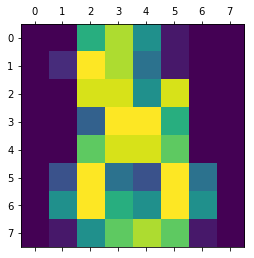

dtype('float64')

In [6]:
plt.matshow(digits.images[1796])
plt.show()
digits.images[1].dtype

<Figure size 432x288 with 0 Axes>

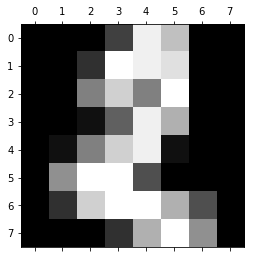

In [6]:
plt.gray()
plt.matshow(digits.images[2])
plt.show()

In [7]:
digits.images.shape

(1797, 8, 8)

In [8]:
digits.target #digits of each images in the index


array([0, 1, 2, ..., 8, 9, 8])

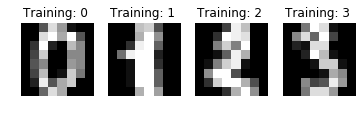

In [9]:
images_and_labels = list(zip(digits.images,digits.target))  #immutable list
for index,(image,label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image,interpolation='nearest')
    plt.title('Training: %i '%label)
    
    

In [10]:
digits.images.shape



(1797, 8, 8)

In [17]:
n_samples=len(digits.images)
data=digits.images.reshape((n_samples,-1))#flattening the dataset,
data.shape


(1797, 64)

build model

In [18]:
#create a classifiee :a random forest classifier
classifier=RandomForestClassifier(n_estimators=30,criterion='entropy')
#we learn the digits on the first half of the digits
classifier.fit(data[:n_samples//2],digits.target[:n_samples//2])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [19]:
#now predictthe valus of the digits on the second half
expected=digits.target[n_samples//2:]#1797//2 to remaining 
predicted=classifier.predict(data[n_samples//2:])#1797//2 to remaining 

###MODEL ACCURACY

In [20]:
predicted

array([8, 3, 4, 9, 0, 8, 9, 8, 1, 2, 3, 4, 5, 6, 4, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 3, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0,
       9, 8, 9, 8, 4, 3, 7, 7, 3, 9, 1, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7,
       9, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 0,
       2, 1, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6,
       1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 9, 7, 9, 5, 4, 4, 9, 0, 8, 9, 8, 0,
       1, 2, 3, 4, 5, 6, 7, 8, 3, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,
       3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7,
       3, 5, 1, 0, 0, 7, 5, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 9,
       9, 1, 5, 0, 5, 5, 2, 2, 9, 0, 0, 1, 7, 6, 3, 2, 1, 7, 9, 6, 3, 1,
       7, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7,
       2, 8, 2, 2, 5, 7, 3, 5, 4, 1, 8, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6,
       7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 5, 4,

In [14]:
classifier.score(data[n_samples//2:],expected)


0.9199110122358176

In [15]:
print("confusion matrix:\n %s" % metrics.confusion_matrix(expected,predicted))



confusion matrix:
 [[87  0  0  0  1  0  0  0  0  0]
 [ 0 82  0  2  0  1  0  0  0  6]
 [ 1  0 78  4  0  0  0  0  0  3]
 [ 1  0  1 75  0  5  0  2  6  1]
 [ 1  1  0  0 85  1  0  1  0  3]
 [ 0  1  0  0  0 85  1  0  0  4]
 [ 0  0  1  0  0  0 90  0  0  0]
 [ 0  0  0  0  1  0  0 87  1  0]
 [ 0  7  0  3  0  4  0  1 72  1]
 [ 0  0  0  2  0  3  0  0  1 86]]


confusion matrix gives right predicted  values in diagonal;(diagonal/total)*100=accuracy
also the value in other indexes is the number of times the wrong prediction occured

In [1]:
images_and_predictions = list(zip(digits.images[n_samples//2:],predicted))  #immutable list
for index,(image,prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image,interpolation='nearest')
    plt.title('Prediction: %i '%prediction)
plt.show()


NameError: name 'digits' is not defined